In [1]:
from RegistrationObj import RegistrationObj, IterativePairwise
import scipy.stats as st
from utils import colour_map, min_max_normalisation, mae, mae_permutation, pcd_to_tif, visualise_pcd
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
from open3d import JVisualizer
import tifffile.tifffile as tiff
import copy 
%matplotlib notebook

from RegistrationObj import RegistrationObj
from GA import GA

import os
from datetime import date
import pandas as pd

# 18ss

## Target image 

"./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_pos_3_Detailed.csv"

In [2]:
pos_path_target_18ss = "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_pos_3_Detailed.csv"
sox2_path_target_18ss = "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_sox2_3_Detailed.csv"


other_target_channels = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_tbxta_3_Detailed.csv",
                         "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_TCF_mRNA_3_Detailed.csv"]

## Source images (All aligned via sox2)

First, we arbitrarily select a tailbud to serve as the target image. Then, all images from the various image combination groups are aligned to the target image using the `IterativePairwise` class. For each group, the image which scores the best in the 3 metrics (`fitness`, `inlier RMSE` and `inlier MAE`) is used to impute the gene expression levels in the target image. 

### Sox2_tbxta_TCF (STT)
Other channels:

1. Tbxta
2. TCF

In [3]:
stt_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_pos_1_Detailed.csv",
                  "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_pos_2_Detailed.csv"]

stt_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_sox2_1_Detailed.csv",
                  "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_sox2_2_Detailed.csv"]

stt_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_tbxta_1_Detailed.csv",
                          "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_TCF_mRNA_1_Detailed.csv"],
                         ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_tbxta_2_Detailed.csv",
                         "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_TCF_mRNA_2_Detailed.csv"]]


In [4]:
stt_18ss = IterativePairwise(stt_pos_source_list_18ss, pos_path_target_18ss, stt_sox2_source_list_18ss, sox2_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = stt_other_source_channels, other_target_channels = other_target_channels, mode = "complete")

stt_18ss_pcd = stt_18ss.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
Using median averaging
1 - Processing Other Source and Target channels
Using median averaging
Using median averaging
--- Registering Source dataset 1
0 - Processing Other Source and Target channels
Using median averaging
1 - Processing Other Source and Target channels
Using median averaging
Using median averaging


#### Results 

In [5]:
stt_18ss.combined_results

[[0.979776476849388, 4.4025435771521115, 4.493416285425757, 13.134487723856],
 [0.9946714031971581,
  4.051277246975751,
  4.0729805179416925,
  9.785297208657889]]

Best image is in list position 2 : "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_pos_2_Detailed.csv"

#### Registering image pos 2

In [6]:
stt_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_pos_2_Detailed.csv"]

stt_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_sox2_2_Detailed.csv"]

stt_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_tbxta_2_Detailed.csv",
                         "./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_TCF_mRNA_2_Detailed.csv"]]


In [7]:
stt_obj = IterativePairwise(stt_pos_source_list_18ss, pos_path_target_18ss, stt_sox2_source_list_18ss, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0], 
                         other_source_channels = stt_other_source_channels, mode = "knn", method = "median" )

stt_18ss_pcd = stt_obj.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[11.80413254]
 [10.59393865]
 [ 8.40513735]
 ...
 [ 8.06603325]
 [13.48805609]
 [ 5.92304331]]
1 - Processing Other Source and Target channels
[[19.35669415]
 [17.25268132]
 [10.40173435]
 ...
 [ 5.06469503]
 [ 4.36898682]
 [ 3.5863643 ]]
Using median averaging


#### tbxta imputed - saved

In [8]:
tbxta_18ss = stt_obj.other_registered_channels[0]
tbxta_18ss_pcd = copy.deepcopy(stt_18ss_pcd)
tbxta_rgb, _ = colour_map(tbxta_18ss,"viridis")
tbxta_18ss_pcd.colors=o3d.utility.Vector3dVector(tbxta_rgb)
visualise_pcd(tbxta_18ss_pcd)

#pcd_to_tif(tbxta_18ss_pcd, tbxta_18ss, 1024, 1024, 120, filename = "stt_tbxta_imputed.tif")

<IPython.core.display.Javascript object>

#### tbxta original - saved

In [9]:
import pandas as pd
target_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_tbxta_3_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
tbxta_target = np.asarray(target_color_df)
stt_original = copy.deepcopy(stt_18ss_pcd)

#pcd_to_tif(stt_original, tbxta_target, 1024, 1024, 120, filename = "tbxta_target.tif")



#### sox2 imputed - saved

In [10]:
sox2_18ss = stt_obj.registered_color
sox2_18ss_pcd = copy.deepcopy(stt_18ss_pcd)
sox2_rgb, _ = colour_map(sox2_18ss,"viridis")
sox2_18ss_pcd.colors=o3d.utility.Vector3dVector(sox2_rgb)
visualise_pcd(sox2_18ss_pcd)
#pcd_to_tif(sox2_18ss_pcd, sox2_imputed, 1024, 1024, 120, selem_color = np.ones((20,6,6)), filename = "stt_sox2_imputed.tif")

<IPython.core.display.Javascript object>

#### sox2 original - saved

In [11]:
import pandas as pd
target_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_sox2_3_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
sox2_target = np.asarray(target_color_df)
stt_original = copy.deepcopy(stt_18ss_pcd)
#pcd_to_tif(stt_original, sox2_target, 1024, 1024, 120, filename = "/results/images/original/sox2_target.tif", return_DAPI = False)

#### TCF imputed - saved

In [12]:
tcf_18ss = stt_obj.other_registered_channels[1]
tcf_18ss_pcd = copy.deepcopy(stt_18ss_pcd)
tcf_rgb, _ = colour_map(tcf_18ss,"viridis")
tcf_18ss_pcd.colors=o3d.utility.Vector3dVector(tcf_rgb)
visualise_pcd(tcf_18ss_pcd)

#pcd_to_tif(tcf_18ss_pcd, tcf_18ss, 1024, 1024, 120, filename = "stt_tcf_imputed.tif")

<IPython.core.display.Javascript object>

#### TCF original - saved

In [13]:
target_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_TCF/18ss_TCF_mRNA_2_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
tcf_source= np.asarray(target_color_df)
stt_original = copy.deepcopy(stt_obj.source_pcd[0])
tcf_original_rgb, _ = colour_map(tcf_source,"viridis")
stt_original.colors=o3d.utility.Vector3dVector(tcf_original_rgb)
visualise_pcd(stt_original)

#pcd_to_tif(stt_original, tcf_source, 1024, 1024, 120, filename = "stt_tcf_original.tif")



<IPython.core.display.Javascript object>

### sox2_tbxta_hes6_cdh6 (STHC)

Other channels:

1. Tbxta
2. Hes6
3. Cdh6

In [14]:
sthc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_pos_1_posterior_Detailed.csv",
                  "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_pos_2_posterior_Detailed.csv",
                            "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_pos_3_posterior_Detailed.csv"]

sthc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_sox2_1_max_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_sox2_2_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_sox2_3_max_posterior_Detailed.csv"]

sthc_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_tbxta_1_posterior_Detailed.csv",
                          "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_cdh6_1_posterior_Detailed.csv",
                         "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_hes6_1_posterior_Detailed.csv"],
                         ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_tbxta_2_posterior_Detailed.csv",
                          "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_cdh6_2_posterior_Detailed.csv",
                         "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_hes6_2_posterior_Detailed.csv"],
                        ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_tbxta_3_posterior_Detailed.csv",
                          "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_cdh6_3_posterior_Detailed.csv",
                         "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_hes6_3_posterior_Detailed.csv"]]


In [15]:
sthc_18ss = IterativePairwise(sthc_pos_source_list_18ss, pos_path_target_18ss, sthc_sox2_source_list_18ss, sox2_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = sthc_other_source_channels)

sthc_18ss_pcd = sthc_18ss.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[14.86183173]
 [15.87172102]
 [13.92349118]
 ...
 [ 9.51935166]
 [ 6.51234553]
 [ 8.64495992]]
1 - Processing Other Source and Target channels
[[4.25939829]
 [4.51999131]
 [3.72740923]
 ...
 [2.57091876]
 [1.71554391]
 [2.4421915 ]]
2 - Processing Other Source and Target channels
[[34.74888102]
 [38.92101142]
 [34.79853927]
 ...
 [18.99333652]
 [17.35842279]
 [14.21014978]]
Using median averaging
--- Registering Source dataset 1
0 - Processing Other Source and Target channels
[[6.55942368]
 [5.52600311]
 [4.11926704]
 ...
 [5.46636076]
 [4.33984123]
 [4.61753708]]
1 - Processing Other Source and Target channels
[[2.42352314]
 [2.1954851 ]
 [2.05906681]
 ...
 [2.19210172]
 [1.7824436 ]
 [2.1040887 ]]
2 - Processing Other Source and Target channels
[[14.13044742]
 [ 9.35815498]
 [ 4.82865985]
 ...
 [13.35465381]
 [ 8.31980083]
 [11.25769858]]
Using median averaging
--- Registering Source dataset 2
0 - Proce

#### Results 

In [16]:
sthc_18ss.combined_results

[[0.9880108991825614, 4.244370454111192, 4.29587412205959, 14.60256678359982],
 [0.9977843426883308,
  3.9714417885787463,
  3.980260682261749,
  18.759113163954304],
 [0.9501940491591203,
  4.4138623829452195,
  4.645222085795309,
  16.774021676791275]]

#### Performing GA

In [17]:
### File directories ###
source_position_name =  "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_pos_3_posterior_Detailed.csv"
source_sox2_name = "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_sox2_3_max_posterior_Detailed.csv"

### DEAP runs ### 

image_name = "STHC"
save_results_path = "./results"
results_name = "NSGA3_coloredICP_run"
num_deap_runs = 3


In [18]:
sthc_ga_obj = RegistrationObj(source_position_name, pos_path_target_18ss, source_sox2_name, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

source_processed_sox2, target_processed_sox2, source_fpfh_sox2, target_fpfh_sox2 = sthc_ga_obj.preprocessing_func()
source_sox2 = sthc_ga_obj.source_color
target_sox2 = sthc_ga_obj.target_color

:: Point Cloud was not downsampled
:: Estimate normal with search radius 20.
:: Compute FPFH feature with search radius 50.
---------------------------------------


In [19]:
merged_path_name = os.path.join(save_results_path, image_name, results_name)

for i in range(num_deap_runs):
    run_name = f'{merged_path_name}_{i}_{date.today()}'
    GA(source_processed = source_processed_sox2, target_processed=target_processed_sox2, 
       source_fpfh = source_fpfh_sox2, target_fpfh= target_fpfh_sox2, source_color = source_sox2,
       target_color = target_sox2, iter_ = i, run_name = run_name)

   	     	 o3d_fitness 	   o3d_rmse  	   o3d_mae    
   	     	-------------	-------------	--------------
gen	evals	mean 	max  	mean   	min  	mean   	min   
0  	30   	0.032	0.948	9666.82	4.649	9667.19	15.688


KeyboardInterrupt: 

#### Registering image pos 1

In [20]:
sthc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_pos_1_posterior_Detailed.csv"]

sthc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_sox2_1_max_posterior_Detailed.csv"]

sthc_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_tbxta_1_posterior_Detailed.csv",
                          "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_cdh6_1_posterior_Detailed.csv",
                         "./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_hes6_1_posterior_Detailed.csv"]]


In [21]:
sthc_obj = IterativePairwise(sthc_pos_source_list_18ss, pos_path_target_18ss, sthc_sox2_source_list_18ss, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0], 
                         other_source_channels = sthc_other_source_channels, mode = "knn")

sthc_obj_18ss_pcd = sthc_obj.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[14.48303415]
 [15.27612964]
 [15.48846114]
 ...
 [ 9.34392148]
 [ 6.24273947]
 [ 7.2370689 ]]
1 - Processing Other Source and Target channels
[[4.1136924 ]
 [4.27365231]
 [4.26503297]
 ...
 [2.50665295]
 [1.64436856]
 [2.12970096]]
2 - Processing Other Source and Target channels
[[40.08307913]
 [45.15872757]
 [32.7747706 ]
 ...
 [18.7520652 ]
 [16.4348218 ]
 [10.94763481]]
Using median averaging


#### cdh6 imputed - saved 

<IPython.core.display.Javascript object>


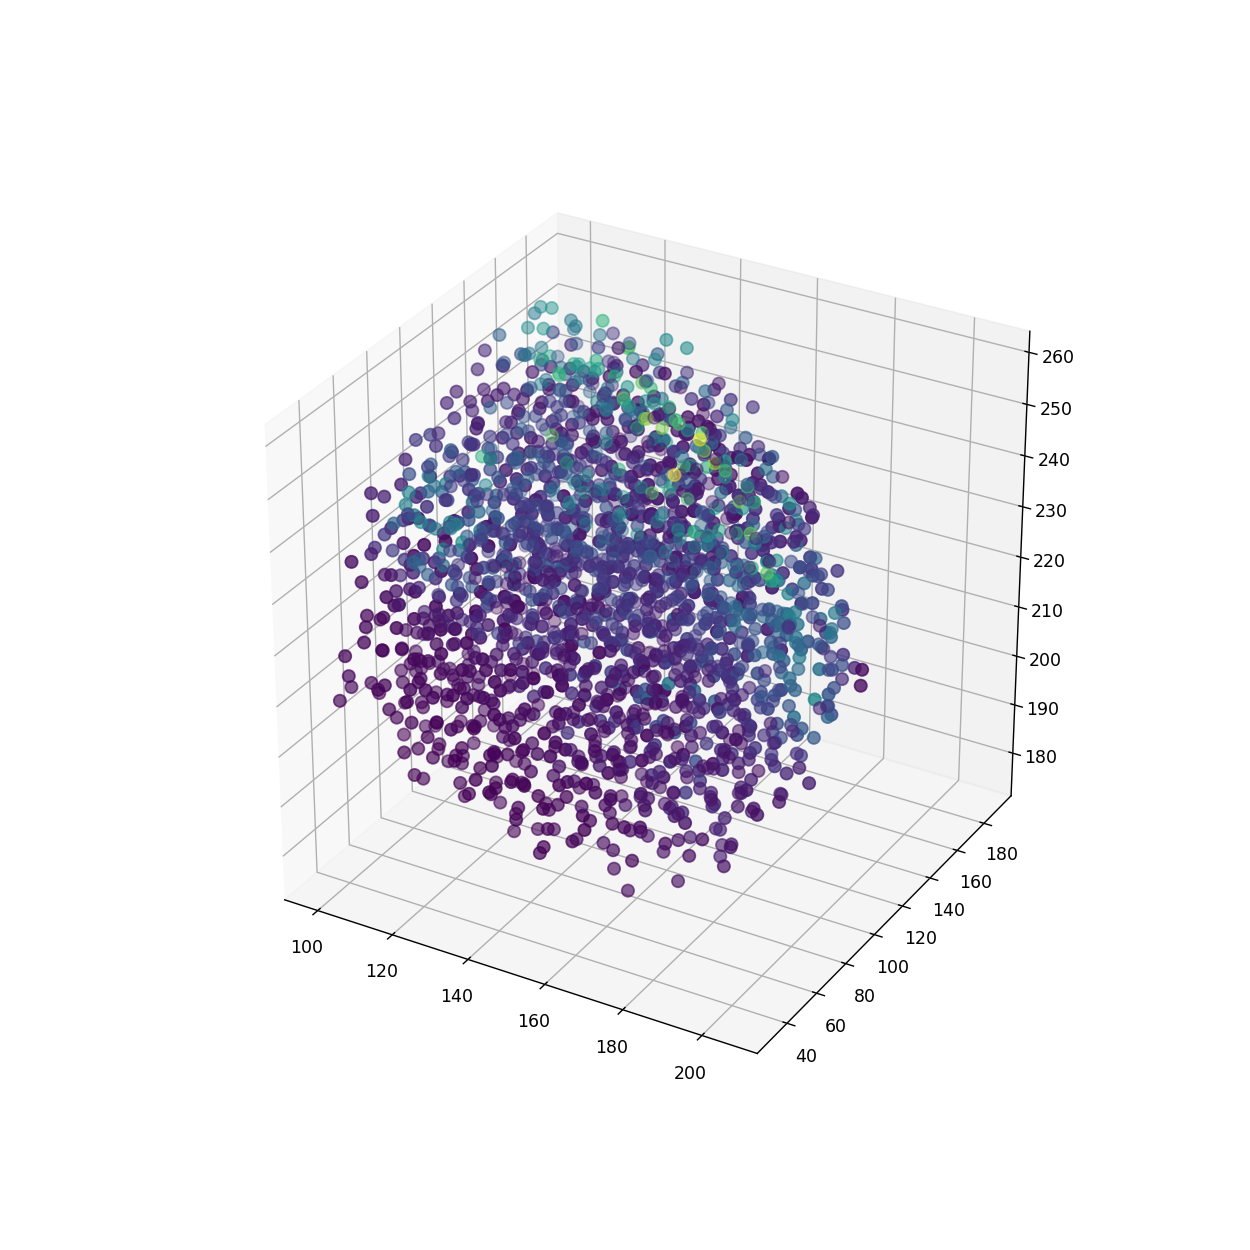

In [22]:
cdh6_18ss = sthc_obj.other_registered_channels[1]
cdh6_18ss_pcd = copy.deepcopy(sthc_obj_18ss_pcd)
cdh6_rgb, _ = colour_map(cdh6_18ss,"viridis")
cdh6_18ss_pcd.colors=o3d.utility.Vector3dVector(cdh6_rgb)
visualise_pcd(cdh6_18ss_pcd)

#pcd_to_tif(cdh6_18ss_pcd, cdh6_18ss, 1024, 1024, 120, filename = "sthc_cdh6_imputed.tif")

#### cdh6 original - saved 

<IPython.core.display.Javascript object>


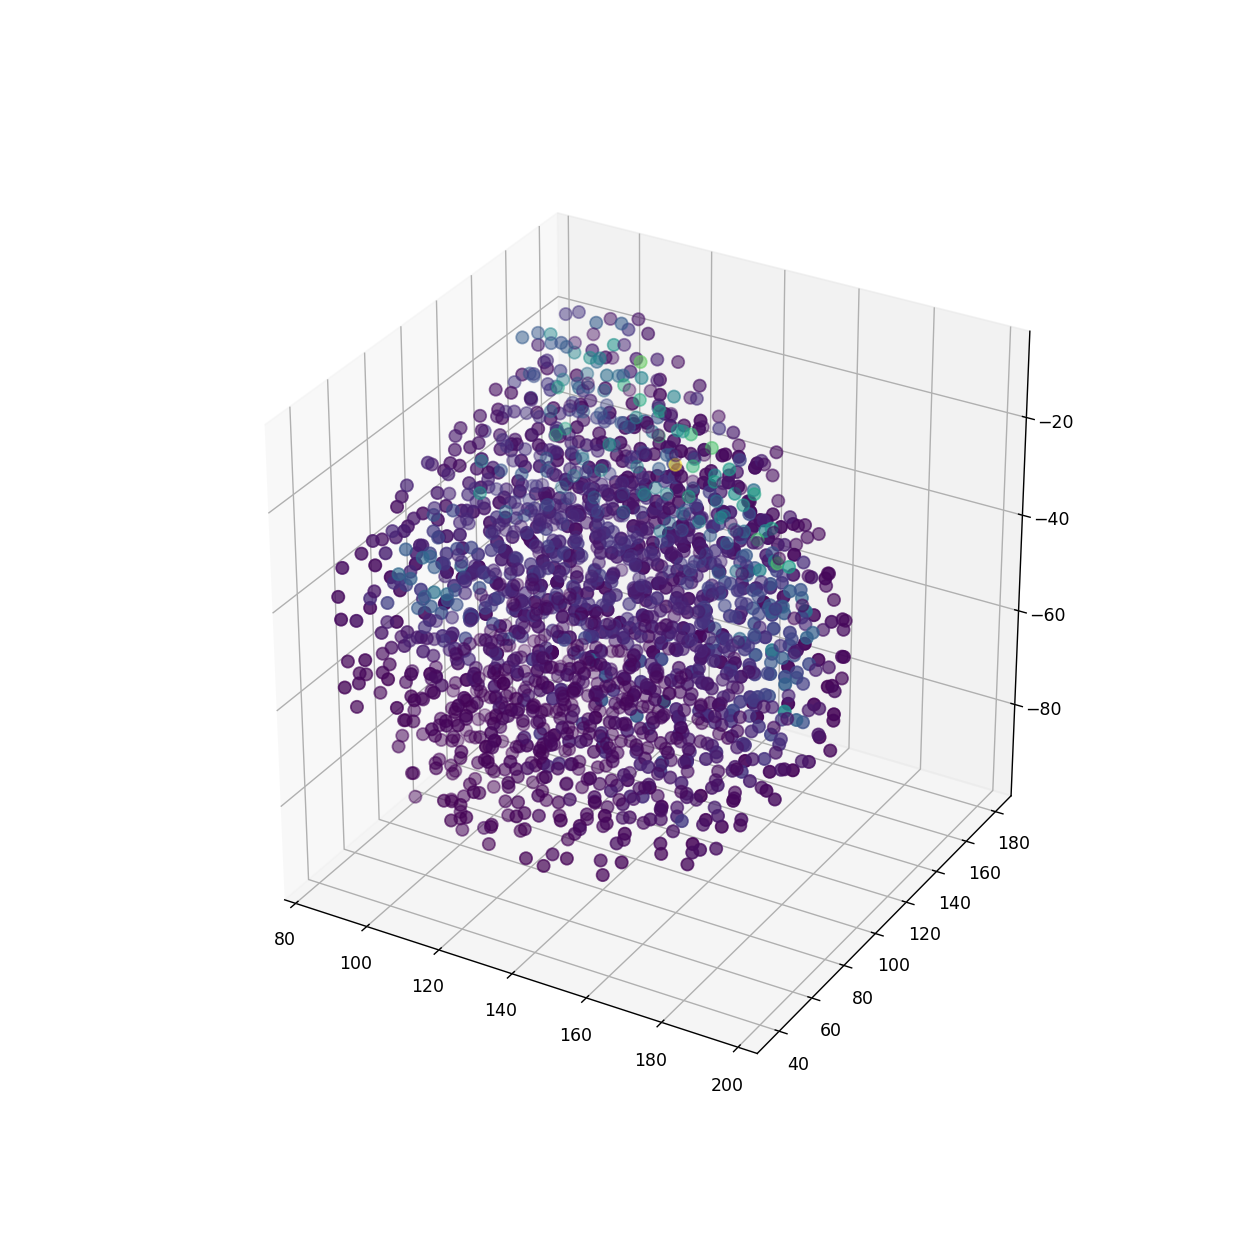

In [23]:
target_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_cdh6_1_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
cdh6_source= np.asarray(target_color_df)
sthc_original = copy.deepcopy(sthc_obj.source_pcd[0])
cdh6_original_rgb, _ = colour_map(cdh6_source,"viridis")
sthc_original.colors=o3d.utility.Vector3dVector(cdh6_original_rgb)
visualise_pcd(sthc_original)


#pcd_to_tif(sthc_original, cdh6_source, 1024, 1024, 120, filename = "sthc_cdh6_original.tif")



#### hes6 imputed - saved 

<IPython.core.display.Javascript object>


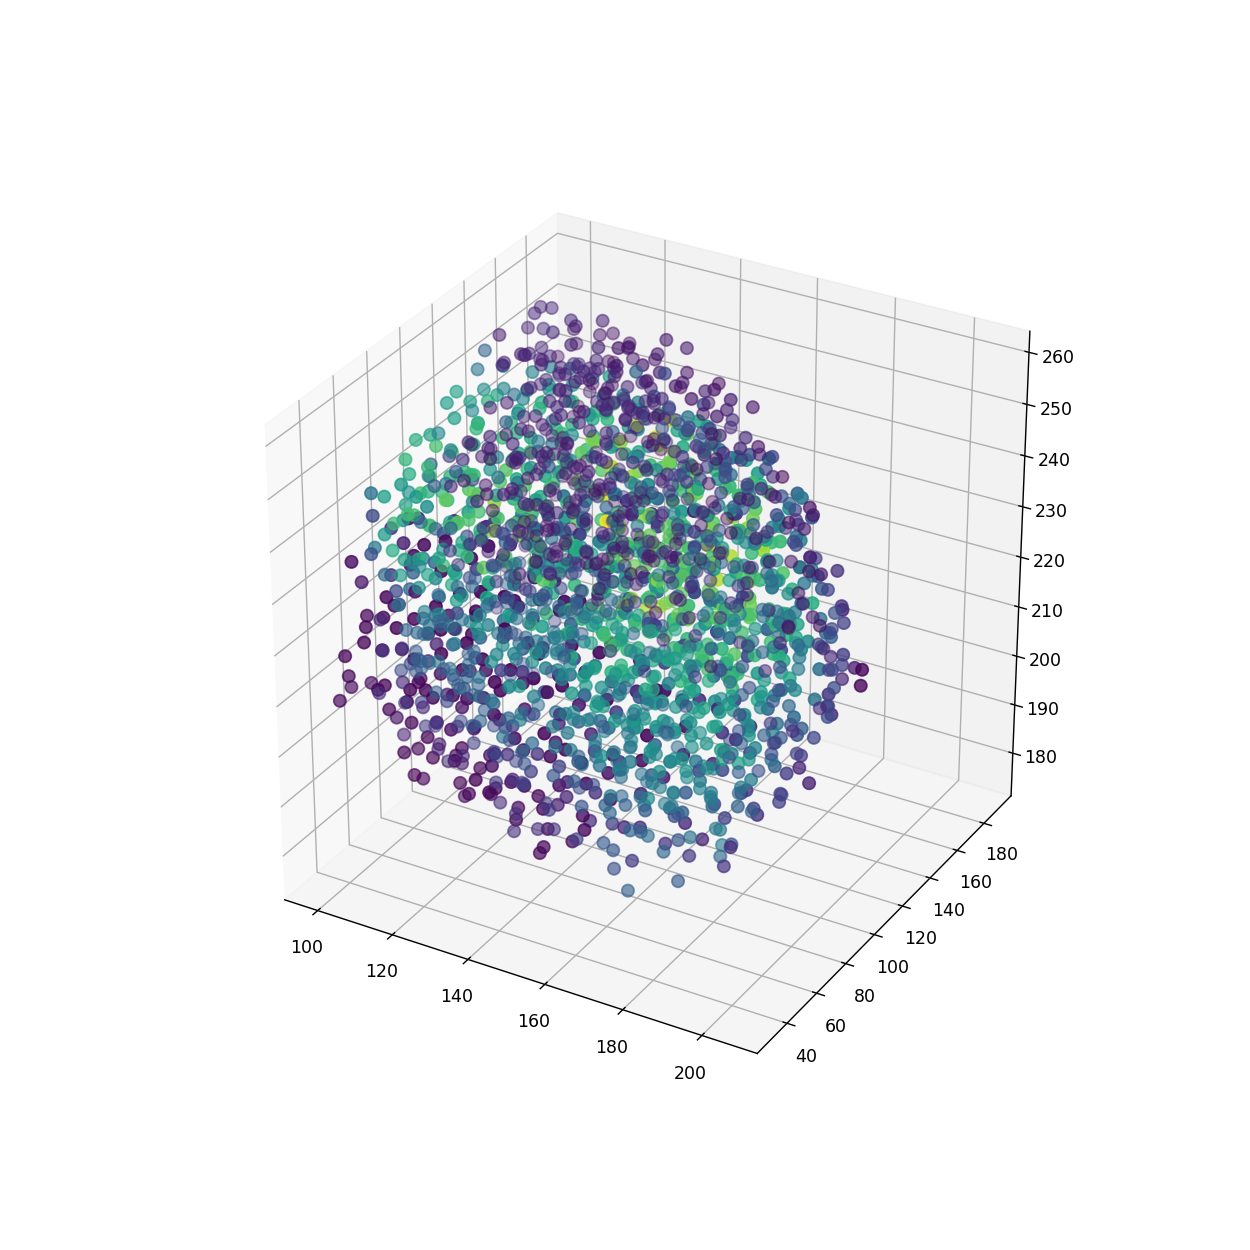

In [24]:
hes6_18ss = sthc_obj.other_registered_channels[2]
hes6_18ss_pcd = copy.deepcopy(sthc_obj_18ss_pcd)
hes6_rgb, _ = colour_map(hes6_18ss,"viridis")
hes6_18ss_pcd.colors=o3d.utility.Vector3dVector(hes6_rgb)
visualise_pcd(hes6_18ss_pcd)

#pcd_to_tif(hes6_18ss_pcd, hes6_18ss, 1024, 1024, 120, filename = "sthc_hes6_imputed.tif")

#### hes6 original - saved

<IPython.core.display.Javascript object>


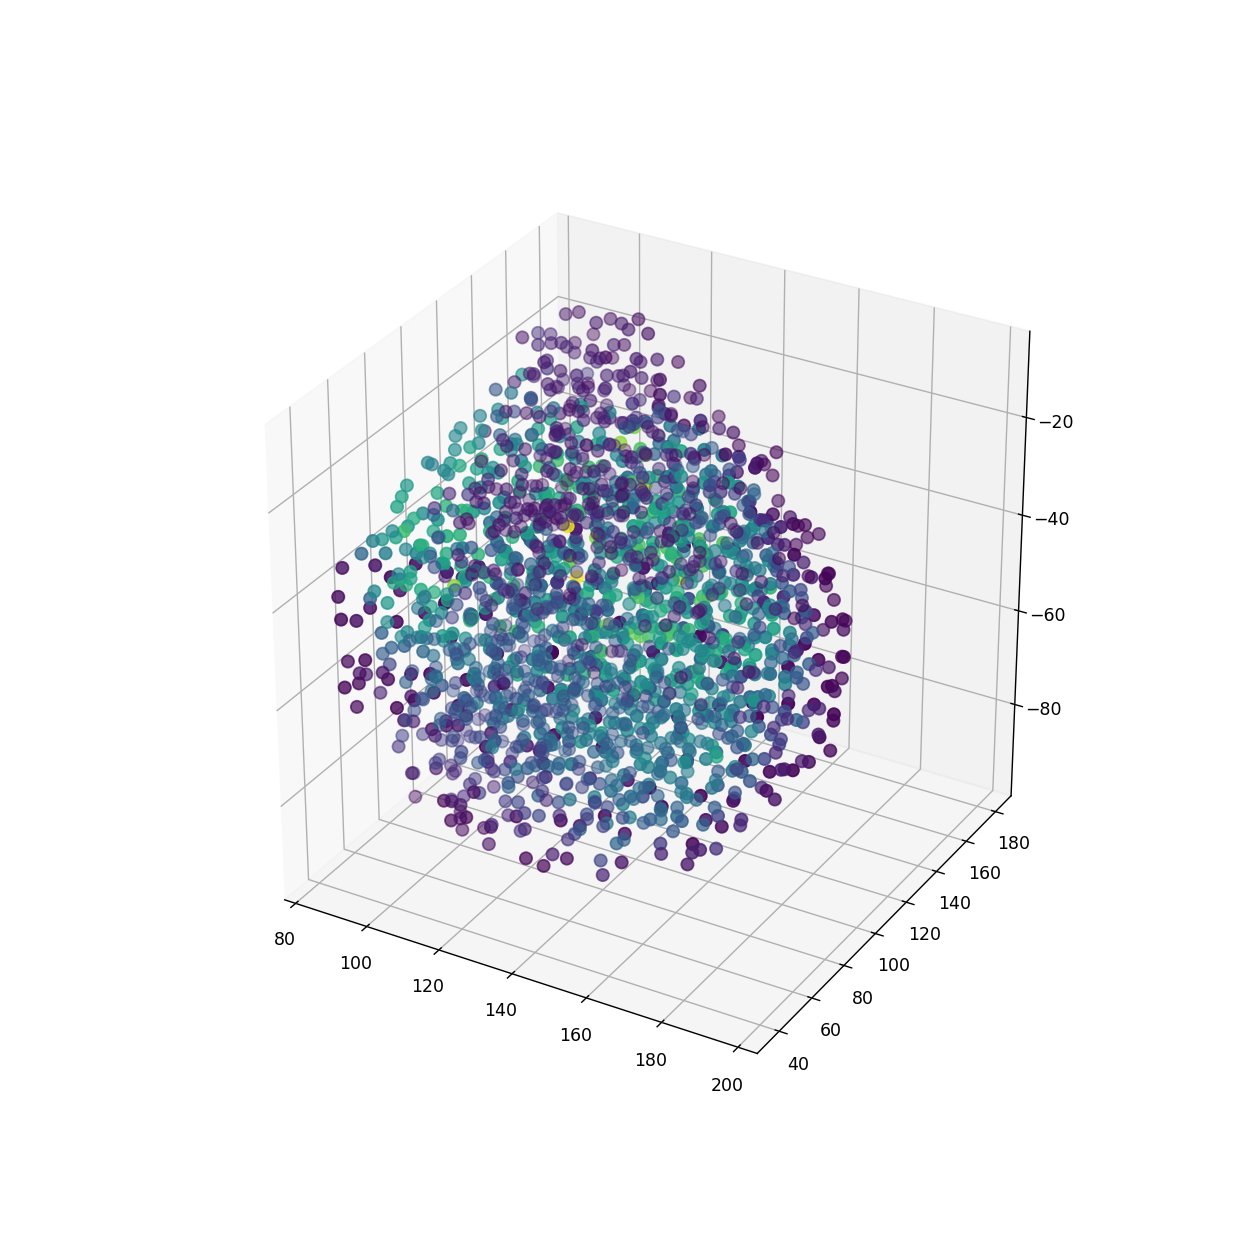

Saving color channel as sthc_hes6_original.tif
Saving DAPI channel as DAPI_sthc_hes6_original.tif


In [25]:
target_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_hes6_cdh6/18ss_hes6_1_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
hes6_source= np.asarray(target_color_df)
sthc_original = copy.deepcopy(sthc_obj.source_pcd[0])
hes6_original_rgb, _ = colour_map(hes6_source,"viridis")
sthc_original.colors=o3d.utility.Vector3dVector(hes6_original_rgb)
visualise_pcd(sthc_original)


pcd_to_tif(sthc_original, hes6_source, 1024, 1024, 120, filename = "sthc_hes6_original.tif")



#### tbxta imputed 

<IPython.core.display.Javascript object>


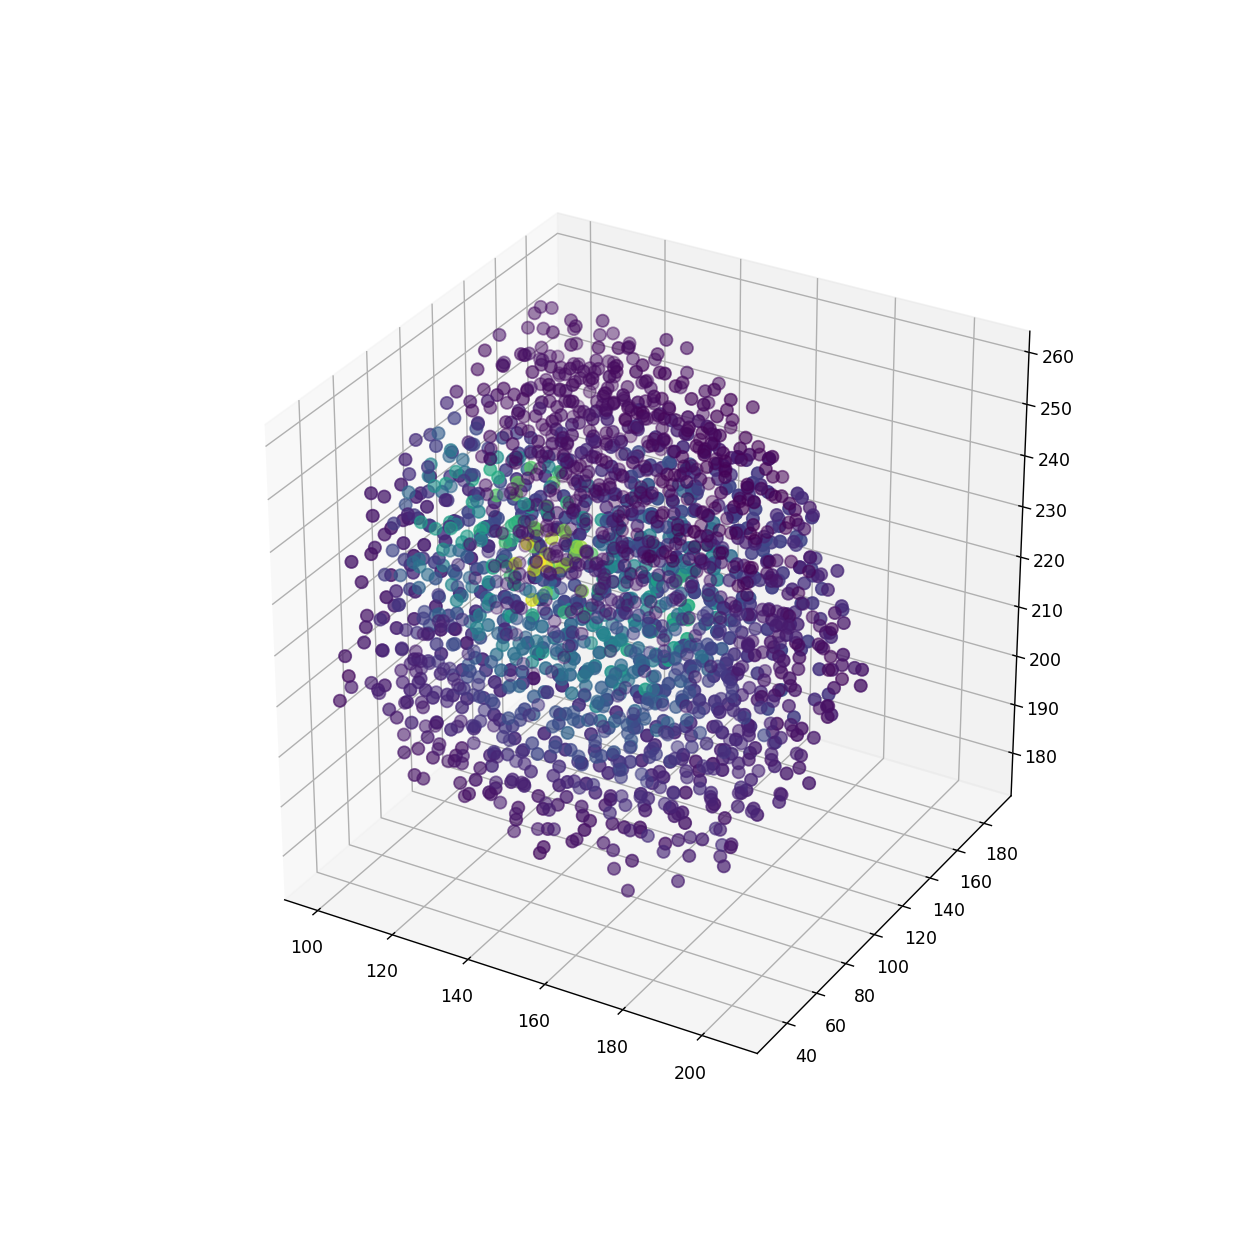

In [26]:
tbxta_18ss = sthc_18ss.other_registered_channels[0]
tbxta_18ss_pcd = copy.deepcopy(sthc_18ss_pcd)
tbxta_rgb, _ = colour_map(tbxta_18ss,"viridis")
tbxta_18ss_pcd.colors=o3d.utility.Vector3dVector(tbxta_rgb)
visualise_pcd(tbxta_18ss_pcd)

### sox2_tbxta_sp5l_cdh6 (STSC)

1. Tbxta
2. Sp5l
3. Cdh6

In [44]:
stsc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_pos_1_posterior_Detailed.csv",
                            "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_pos_2_posterior_Detailed.csv",
                            "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_pos_4_posterior_Detailed.csv",
                            "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_pos_5_posterior_Detailed.csv"]

stsc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sox2_1_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sox2_2_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sox2_4_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sox2_5_max_posterior_Detailed.csv"]

stsc_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_tbxta_1_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_cdh6_1_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sp5l_1_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_tbxta_2_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_cdh6_2_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sp5l_2_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_tbxta_4_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_cdh6_4_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sp5l_4_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_tbxta_5_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_cdh6_5_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sp5l_5_posterior_Detailed.csv"]]


In [45]:
stsc_18ss = IterativePairwise(stsc_pos_source_list_18ss, pos_path_target_18ss, stsc_sox2_source_list_18ss, sox2_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = stsc_other_source_channels, voxel_size = 5)

stsc_18ss_pcd = stsc_18ss.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[ 6.96393013]
 [10.66519279]
 [11.37864237]
 ...
 [ 4.51172738]
 [ 4.2512218 ]
 [ 3.98614337]]
1 - Processing Other Source and Target channels
[[1.80711675]
 [2.20871072]
 [2.33407282]
 ...
 [2.49605975]
 [2.18944999]
 [2.16236593]]
2 - Processing Other Source and Target channels
[[2.248232  ]
 [2.40214885]
 [2.46798831]
 ...
 [3.08063875]
 [3.07889434]
 [2.71536508]]
Using median averaging
--- Registering Source dataset 1
0 - Processing Other Source and Target channels
[[ 8.58008428]
 [ 8.04449575]
 [ 7.4304571 ]
 ...
 [ 8.03570502]
 [ 8.22227305]
 [10.38421918]]
1 - Processing Other Source and Target channels
[[4.20106922]
 [4.23149577]
 [4.33610057]
 ...
 [2.32173936]
 [2.3954133 ]
 [3.20619054]]
2 - Processing Other Source and Target channels
[[6.63699816]
 [6.13806001]
 [5.04471516]
 ...
 [3.18717892]
 [3.34201445]
 [3.41924087]]
Using median averaging
--- Registering Source dataset 2
0 - Processing 

#### Results 

In [46]:
stsc_18ss.combined_results

[[0.9960369881109643,
  4.079637850240324,
  4.095869831076825,
  17.662286640916456],
 [0.9237121510027526, 4.52234069421267, 4.895833284539302, 13.675470347898317],
 [0.9773156899810964,
  4.305037333670285,
  4.404960830776751,
  23.889697379427627],
 [0.9480083857442348, 4.506437098376674, 4.753583582321259, 13.26576449045916]]

#### Registering image pos 2

In [47]:
stsc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_pos_2_posterior_Detailed.csv"]

stsc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sox2_2_max_posterior_Detailed.csv"]

stsc_other_source_channels = [ ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_tbxta_2_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_cdh6_2_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sp5l_2_posterior_Detailed.csv"]]


In [48]:
stsc_obj = IterativePairwise(stsc_pos_source_list_18ss, pos_path_target_18ss, stsc_sox2_source_list_18ss, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0], 
                         other_source_channels = stsc_other_source_channels )

stsc_obj_18ss_pcd = stsc_obj.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[ 8.53944863]
 [ 8.01841684]
 [ 7.33556015]
 ...
 [ 7.95859909]
 [ 8.55087741]
 [11.42165015]]
1 - Processing Other Source and Target channels
[[4.20618342]
 [4.28418957]
 [4.33832942]
 ...
 [2.3123731 ]
 [2.66216378]
 [3.05366038]]
2 - Processing Other Source and Target channels
[[6.64157968]
 [6.23648651]
 [5.02795689]
 ...
 [3.25925448]
 [3.34679561]
 [3.47799598]]
Using median averaging


In [49]:
tbxta_18ss = stsc_obj.other_registered_channels[0]
cdh6_18ss = stsc_obj.other_registered_channels[1]
sp5l_18ss = stsc_obj.other_registered_channels[2]

#### sp5l imputed - saved 

In [50]:
sp5l_18ss_pcd = copy.deepcopy(stsc_obj_18ss_pcd)
sp5l_rgb, _ = colour_map(sp5l_18ss,"viridis")
sp5l_18ss_pcd.colors=o3d.utility.Vector3dVector(sp5l_rgb)
visualise_pcd(sp5l_18ss_pcd)

#pcd_to_tif(sp5l_18ss_pcd, sp5l_18ss, 1024, 1024, 120, filename = "stsc_sp5l_imputed.tif")

<IPython.core.display.Javascript object>

#### sp5l original - saved 

In [51]:
target_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_sp5l_2_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
sp5l_source= np.asarray(target_color_df)
stsc_original = copy.deepcopy(stsc_obj.source_pcd[0])
sp5l_original_rgb, _ = colour_map(sp5l_source,"viridis")
stsc_original.colors=o3d.utility.Vector3dVector(sp5l_original_rgb)
visualise_pcd(stsc_original)

#pcd_to_tif(stsc_original, sp5l_source, 1024, 1024, 120, filename = "stsc_sp5l_original.tif")

<IPython.core.display.Javascript object>

#### cdh6 imputed - saved 

In [52]:
cdh6_18ss_pcd = copy.deepcopy(stsc_obj_18ss_pcd)
cdh6_rgb, _ = colour_map(cdh6_18ss,"viridis")
cdh6_18ss_pcd.colors=o3d.utility.Vector3dVector(cdh6_rgb)
visualise_pcd(cdh6_18ss_pcd)

#pcd_to_tif(cdh6_18ss_pcd, cdh6_18ss, 1024, 1024, 120, filename = "sthc_cdh6_imputed.tif")

<IPython.core.display.Javascript object>

#### cdh6 original - saved 

In [53]:
target_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_sp5l_cdh6/18ss_cdh6_2_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
cdh6_source= np.asarray(target_color_df)
stsc_original = copy.deepcopy(stsc_obj.source_pcd[0])
cdh6_original_rgb, _ = colour_map(cdh6_source,"viridis")
stsc_original.colors=o3d.utility.Vector3dVector(cdh6_original_rgb)
visualise_pcd(stsc_original)
#pcd_to_tif(sthc_original, cdh6_source, 1024, 1024, 120, filename = "sthc_cdh6_original.tif")

<IPython.core.display.Javascript object>

#### tbxta imputed 

In [54]:
tbxta_18ss_pcd = copy.deepcopy(stsc_18ss_pcd)
tbxta_rgb, _ = colour_map(tbxta_18ss,"viridis")
tbxta_18ss_pcd.colors=o3d.utility.Vector3dVector(tbxta_rgb)
visualise_pcd(tbxta_18ss_pcd)

<IPython.core.display.Javascript object>

### sox2_tbxta_tagln3b_cdh6 (STTC)

Other channels:

1. tbxta
2. tagln3b
3. cdh6


In [55]:
sttc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_pos_1_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_pos_2_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_pos_3_posterior_Detailed.csv"]

sttc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_sox2_1_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_sox2_2_max_posterior_Detailed.csv",
                              "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_sox2_3_max_posterior_Detailed.csv"]

sttc_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tbxta_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_cdh6_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tagln3b_1_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tbxta_2_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_cdh6_2_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tagln3b_2_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tbxta_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_cdh6_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tagln3b_3_posterior_Detailed.csv"]]                   

In [56]:
sttc_18ss = IterativePairwise(sttc_pos_source_list_18ss, pos_path_target_18ss, sttc_sox2_source_list_18ss, sox2_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = sttc_other_source_channels)

sttc_18ss_pcd = sttc_18ss.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[2.06002027]
 [3.4373406 ]
 [4.75457241]
 ...
 [2.11071381]
 [0.96876814]
 [1.51154203]]
1 - Processing Other Source and Target channels
[[1.95937534]
 [2.52342902]
 [4.56159636]
 ...
 [0.56258186]
 [0.5042291 ]
 [0.45099682]]
2 - Processing Other Source and Target channels
[[6.06894656]
 [6.41280221]
 [6.34530306]
 ...
 [3.44318487]
 [3.02961941]
 [3.11166677]]
Using median averaging
--- Registering Source dataset 1
0 - Processing Other Source and Target channels
[[4.23555353]
 [3.23844455]
 [1.6332786 ]
 ...
 [2.02842222]
 [1.18752403]
 [1.79289158]]
1 - Processing Other Source and Target channels
[[1.34772432]
 [1.1315841 ]
 [0.70032879]
 ...
 [1.3181855 ]
 [1.0463326 ]
 [1.1542077 ]]
2 - Processing Other Source and Target channels
[[3.44738239]
 [3.67278972]
 [3.43610091]
 ...
 [4.81187313]
 [3.43165338]
 [3.87306808]]
Using median averaging
--- Registering Source dataset 2
0 - Processing Other Source

#### Results 

In [57]:
sttc_18ss.combined_results

[[0.9574148296593187, 4.536755512039645, 4.738547358467363, 16.57161825206691],
 [0.9276572064552031,
  4.551792208689009,
  4.906761007207048,
  16.637938436899223],
 [0.9696789536266349, 4.397442173844745, 4.53494649687729, 14.096600122846393]]

#### Registering image pos 3

In [58]:
sttc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_pos_3_posterior_Detailed.csv"]

sttc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_sox2_3_max_posterior_Detailed.csv"]

sttc_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tbxta_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_cdh6_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tagln3b_3_posterior_Detailed.csv"]]


In [59]:
sttc_obj = IterativePairwise(sttc_pos_source_list_18ss, pos_path_target_18ss, sttc_sox2_source_list_18ss, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0], 
                         other_source_channels = sttc_other_source_channels )

sttc_obj_18ss_pcd = sttc_obj.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[2.51714628]
 [2.02732621]
 [1.38481823]
 ...
 [2.18558316]
 [3.77686903]
 [2.33514646]]
1 - Processing Other Source and Target channels
[[1.16465317]
 [1.08297126]
 [0.96014596]
 ...
 [0.69167477]
 [1.2518892 ]
 [0.94811568]]
2 - Processing Other Source and Target channels
[[4.80686016]
 [4.32466164]
 [3.46701634]
 ...
 [3.20345685]
 [4.00159106]
 [3.25948082]]
Using median averaging


#### tagln3b imputed - saved 

In [60]:
tagln3b_18ss = sttc_obj.other_registered_channels[2]
tagln3b_18ss_pcd = copy.deepcopy(sttc_obj_18ss_pcd)
tagln3b_rgb, _ = colour_map(tagln3b_18ss,"viridis")
tagln3b_18ss_pcd.colors=o3d.utility.Vector3dVector(tagln3b_rgb)
visualise_pcd(tagln3b_18ss_pcd)

#pcd_to_tif(tagln3b_18ss_pcd, tagln3b_18ss, 1024, 1024, 120, filename = "sttc_tagln3b_imputed.tif")

/home/porcupine/Projects/kane/zfin_mapping/utils.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = figsize)


<IPython.core.display.Javascript object>

#### tagn3b original - saved 

In [61]:
tagln3b_source_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_tagln3b_cdh6/18ss_tagln3b_3_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
tagln3b_color = np.asarray(tagln3b_source_color_df)
sttc_original = copy.deepcopy(sttc_obj.source_pcd[0])
tagln3b_original_rgb, _ = colour_map(tagln3b_color,"viridis")
sttc_original.colors=o3d.utility.Vector3dVector(tagln3b_original_rgb)
visualise_pcd(sttc_original)


#pcd_to_tif(sttc_original, tagln3b_color, 1024, 1024, 120, filename = "sttc_tagln3b_original.tif")



<IPython.core.display.Javascript object>

### sox2_tbxta_znf703_cdh6 (STZC)

Other channels:
1. Tbxta
2. Cdh6
3. Znf703



In [62]:
stzc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_pos_1_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_pos_2_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_pos_3_posterior_Detailed.csv",
                            "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_pos_4_posterior_Detailed.csv"]

stzc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_sox2_1_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_sox2_2_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_sox2_3_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_sox2_4_max_posterior_Detailed.csv"]

stzc_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_tbxta_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_cdh6_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_znf703_1_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_tbxta_2_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_cdh6_2_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_znf703_2_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_tbxta_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_cdh6_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_znf703_3_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_tbxta_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_cdh6_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_znf703_4_posterior_Detailed.csv"]]                   

In [ ]:
stzc_18ss = IterativePairwise(stzc_pos_source_list_18ss, pos_path_target_18ss, stzc_sox2_source_list_18ss, sox2_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = stzc_other_source_channels)

stzc_18ss_pcd = stzc_18ss.iterative_registration(jupyter_visualise = False, verbose = False)

--- Registering Source dataset 0
0 - Processing Other Source and Target channels
[[4.58116314]
 [5.01917476]
 [6.20474914]
 ...
 [3.553241  ]
 [3.3135978 ]
 [4.22587699]]
1 - Processing Other Source and Target channels
[[0.86497323]
 [1.03003055]
 [1.2633349 ]
 ...
 [1.32576579]
 [1.23796744]
 [1.50807496]]
2 - Processing Other Source and Target channels
[[3.80960621]
 [4.0963584 ]
 [3.65400639]
 ...
 [7.35996754]
 [6.33233278]
 [6.39902713]]
Using median averaging
--- Registering Source dataset 1


#### Results 

In [ ]:
stzc_18ss.combined_results

#### Registering image pos 4

In [ ]:
stzc_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_pos_4_posterior_Detailed.csv"]

stzc_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_sox2_4_max_posterior_Detailed.csv"]

stzc_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_tbxta_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_cdh6_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_znf703_4_posterior_Detailed.csv"]]


In [ ]:
stzc_obj = IterativePairwise(stzc_pos_source_list_18ss, pos_path_target_18ss, stzc_sox2_source_list_18ss, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0], 
                         other_source_channels = stzc_other_source_channels )

stzc_obj_18ss_pcd = stzc_obj.iterative_registration(jupyter_visualise = False, verbose = False)

#### znf703 imputed - saved

In [ ]:
znf703_18ss = stzc_obj.other_registered_channels[2]
znf703_18ss_pcd = copy.deepcopy(stzc_obj_18ss_pcd)
znf703_rgb, _ = colour_map(znf703_18ss,"viridis")
znf703_18ss_pcd.colors=o3d.utility.Vector3dVector(znf703_rgb)
visualise_pcd(znf703_18ss_pcd)

#pcd_to_tif(znf703_18ss_pcd, znf703_18ss, 1024, 1024, 120, filename = "stzc_znf703_imputed.tif")

#### znf703 original - saved

In [ ]:
znf703_source_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_znf703_cdh6/18ss_znf703_4_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
znf703_color = np.asarray(znf703_source_color_df)
stzc_original = copy.deepcopy(stzc_obj.source_pcd[0])
znf703_original_rgb, _ = colour_map(znf703_color,"viridis")
stzc_original.colors=o3d.utility.Vector3dVector(znf703_original_rgb)
visualise_pcd(stzc_original)


pcd_to_tif(stzc_original, znf703_color, 1024, 1024, 120, filename = "stzc_znf703_original.tif")



### sox2_tbxta_wnt8a_depdc7a (STWD)

Other channels:
1. Tbxta
2. Wnt8a
3. Depdc7a


In [ ]:
stwd_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_pos_1_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_pos_2_posterior_Detailed.csv",
                            "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_pos_4_posterior_Detailed.csv"]

stwd_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_sox2_1_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_sox2_2_max_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_sox2_4_max_posterior_Detailed.csv"]

stwd_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_tbxta_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_wnt8a_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_depdc7a_1_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_tbxta_2_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_wnt8a_2_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_depdc7a_2_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_tbxta_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_wnt8a_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_depdc7a_4_posterior_Detailed.csv"]]



In [ ]:
stwd_18ss = IterativePairwise(stwd_pos_source_list_18ss, pos_path_target_18ss, stwd_sox2_source_list_18ss, sox2_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = stwd_other_source_channels)

stwd_18ss_pcd = stwd_18ss.iterative_registration(jupyter_visualise = False, verbose = False)

#### Results 

In [ ]:
stwd_18ss.combined_results

#### Registering image pos 1

In [ ]:
stwd_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_pos_1_posterior_Detailed.csv"]

stwd_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_sox2_1_max_posterior_Detailed.csv"]

stwd_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_tbxta_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_wnt8a_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_depdc7a_1_posterior_Detailed.csv"]]


In [ ]:
stwd_obj = IterativePairwise(stwd_pos_source_list_18ss, pos_path_target_18ss, stwd_sox2_source_list_18ss, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0], 
                         other_source_channels = stwd_other_source_channels )

stwd_obj_18ss_pcd = stwd_obj.iterative_registration(jupyter_visualise = False, verbose = False)

#### Wnt8a imputed - saved 

In [ ]:
wnt8a_18ss = stwd_obj.other_registered_channels[1]
wnt8a_18ss_pcd = copy.deepcopy(stwd_obj_18ss_pcd)
wnt8a_rgb, _ = colour_map(wnt8a_18ss,"viridis")
wnt8a_18ss_pcd.colors=o3d.utility.Vector3dVector(wnt8a_rgb)
visualise_pcd(wnt8a_18ss_pcd)

#pcd_to_tif(wnt8a_18ss_pcd, wnt8a_18ss, 1024, 1024, 120, filename = "stwd_wnt8a_imputed.tif")

#### Wnt8a original - saved 

In [ ]:
wnt8a_source_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_wnt8a_1_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
wnt8a_color = np.asarray(wnt8a_source_color_df)
stwd_original = copy.deepcopy(stwd_obj.source_pcd[0])
wnt8a_original_rgb, _ = colour_map(wnt8a_color,"viridis")
stwd_original.colors=o3d.utility.Vector3dVector(wnt8a_original_rgb)
visualise_pcd(stwd_original)


#pcd_to_tif(stwd_original, wnt8a_color, 1024, 1024, 120, filename = "stwd_wnt8a_original.tif")



#### Depdc7a imputed - saved 

In [ ]:
depdc7a_18ss = stwd_obj.other_registered_channels[2]
depdc7a_18ss_pcd = copy.deepcopy(stwd_obj_18ss_pcd)
depdc7a_rgb, _ = colour_map(depdc7a_18ss,"viridis")
depdc7a_18ss_pcd.colors=o3d.utility.Vector3dVector(depdc7a_rgb)
visualise_pcd(depdc7a_18ss_pcd)

#pcd_to_tif(depdc7a_18ss_pcd, depdc7a_18ss, 1024, 1024, 120, filename = "stwd_depdc7a_imputed.tif")

#### Depdc7a original - saved 

In [ ]:
depdc7a_source_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_wnt8a_depdc7a/18ss_depdc7a_1_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
depdc7a_color = np.asarray(depdc7a_source_color_df)
stwd_original = copy.deepcopy(stwd_obj.source_pcd[0])
depdc7a_original_rgb, _ = colour_map(depdc7a_color,"viridis")
stwd_original.colors=o3d.utility.Vector3dVector(depdc7a_original_rgb)
visualise_pcd(stwd_original)


#pcd_to_tif(stwd_original, depdc7a_color, 1024, 1024, 120, filename = "stwd_depdc7a_original.tif")



### sox2_tbxta_thbs2_id3 (STTI)

Other channels:
1. Tbxta
2. Thbs2
3. Id3


In [ ]:
stti_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_pos_1_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_pos_3_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_pos_4_posterior_Detailed.csv"]

stti_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_sox2_max_1_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_sox2_max_3_posterior_Detailed.csv",
                             "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_sox2_max_4_posterior_Detailed.csv"]

stti_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_tbxta_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_thbs2_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_id3_1_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_tbxta_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_thbs2_3_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_id3_3_posterior_Detailed.csv"],
                             ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_tbxta_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_thbs2_4_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_id3_4_posterior_Detailed.csv"]]                   

In [ ]:
stti_18ss = IterativePairwise(stti_pos_source_list_18ss, pos_path_target_18ss, stti_sox2_source_list_18ss, sox2_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = stti_other_source_channels)

stti_18ss_pcd = stti_18ss.iterative_registration(jupyter_visualise = False, verbose = False)

#### Results 

In [ ]:
stti_18ss.combined_results

#### Registering image 1

In [ ]:
stti_pos_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_pos_1_posterior_Detailed.csv"]

stti_sox2_source_list_18ss = ["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_sox2_max_1_posterior_Detailed.csv"]

stti_other_source_channels = [["./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_tbxta_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_thbs2_1_posterior_Detailed.csv",
                               "./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_id3_1_posterior_Detailed.csv"]]


In [ ]:
stti_obj = IterativePairwise(stti_pos_source_list_18ss, pos_path_target_18ss, stti_sox2_source_list_18ss, sox2_path_target_18ss, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0], 
                         other_source_channels = stti_other_source_channels )

stti_obj_18ss_pcd = stti_obj.iterative_registration(jupyter_visualise = False, verbose = False)

#### thbs2 imputed - saved 

In [ ]:
thbs2_18ss = stti_obj.other_registered_channels[1]
thbs2_18ss_pcd = copy.deepcopy(stti_obj_18ss_pcd)
thbs2_rgb, _ = colour_map(thbs2_18ss,"viridis")
thbs2_18ss_pcd.colors=o3d.utility.Vector3dVector(thbs2_rgb)
visualise_pcd(thbs2_18ss_pcd)

#pcd_to_tif(thbs2_18ss_pcd, thbs2_18ss, 1024, 1024, 120, filename = "stti_thbs2_imputed.tif")

#### thbs2 original - saved

In [ ]:
thbs2_source_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_thbs2_1_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
thbs2_color = np.asarray(thbs2_source_color_df)
stti_original = copy.deepcopy(stti_obj.source_pcd[0])
thbs2_original_rgb, _ = colour_map(thbs2_color,"viridis")
stti_original.colors=o3d.utility.Vector3dVector(thbs2_original_rgb)
visualise_pcd(stti_original)

#pcd_to_tif(stti_original, thbs2_color, 1024, 1024, 120, filename = "stti_thbs2_original.tif")



#### id3 imputed - saved 

In [ ]:
id3_18ss = stti_obj.other_registered_channels[2]
id3_18ss_pcd = copy.deepcopy(stti_obj_18ss_pcd)
id3_rgb, _ = colour_map(id3_18ss,"viridis")
id3_18ss_pcd.colors=o3d.utility.Vector3dVector(id3_rgb)
visualise_pcd(id3_18ss_pcd)

#pcd_to_tif(id3_18ss_pcd, id3_18ss, 1024, 1024, 120, filename = "stti_id3_imputed.tif")

#### id3 original - saved 

In [ ]:
id3_source_color_df = pd.read_csv("./datasets/6-multiple_alignment/18ss/sox2_tbxta_thbs2_id3/18ss_id3_1_posterior_Detailed.csv", skiprows = [0,1,2], usecols = [0], header = 0)
id3_color = np.asarray(id3_source_color_df)
stti_original = copy.deepcopy(stti_obj.source_pcd[0])
id3_original_rgb, _ = colour_map(id3_color,"viridis")
stti_original.colors=o3d.utility.Vector3dVector(id3_original_rgb)
visualise_pcd(stti_original)

#pcd_to_tif(stti_original, id3_color, 1024, 1024, 120, filename = "stti_id3_original.tif")



## Combined dataframe

In [ ]:
col_names = ["Tbxta", "Sox2", "TCF", "Hes6", "Cdh6", "Sp5l", "Tagln3b", "Znf703", "Wnt8a", "Depdc7a", "Thbs2", "Id3"]
gene_exp = [tbxta_18ss, sox2_18ss, tcf_18ss, hes6_18ss, cdh6_18ss, sp5l_18ss, tagln3b_18ss, znf703_18ss,
           wnt8a_18ss, depdc7a_18ss, thbs2_18ss, id3_18ss]
mydict = {col_names[i] : gene_exp[i].flatten() for i in range(len(col_names))}
myindex = np.arange(0,tbxta_18ss.shape[0]).tolist()
df = pd.DataFrame(mydict, index = myindex)
df.to_csv('18ss_combined.csv') 

# Convert entire directory into zip file 

In [ ]:
!tar cvfz zfin_mapping.tar.gz *